In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


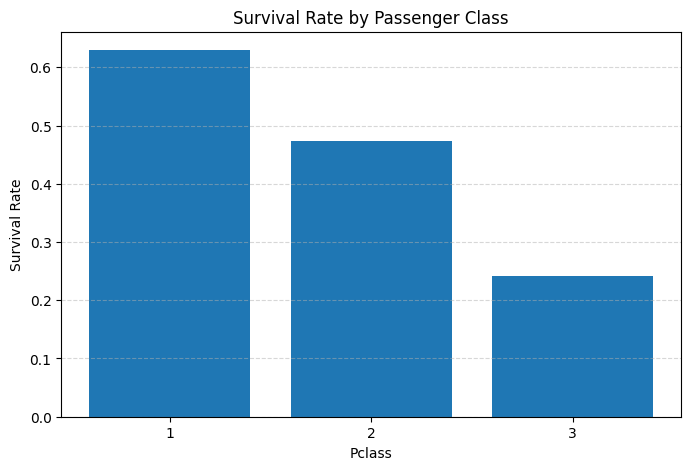

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
#df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
# print(pd)
survival_rate = df_train.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8,5))
plt.bar(survival_rate.index, survival_rate.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks([1,2,3])
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()


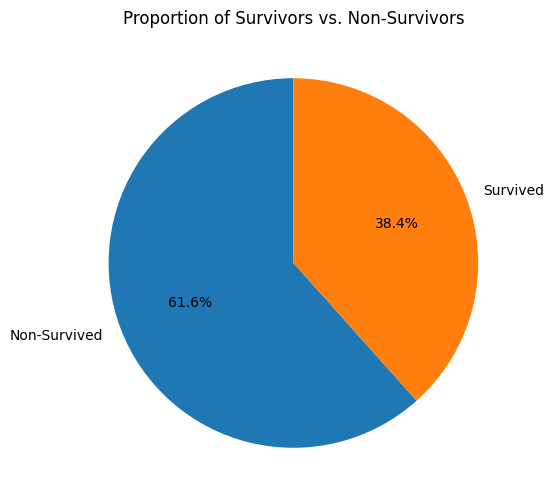

In [5]:
survival_counts = df_train['Survived'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    survival_counts,
    labels=["Non-Survived", "Survived"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Survivors vs. Non-Survivors")
plt.show()


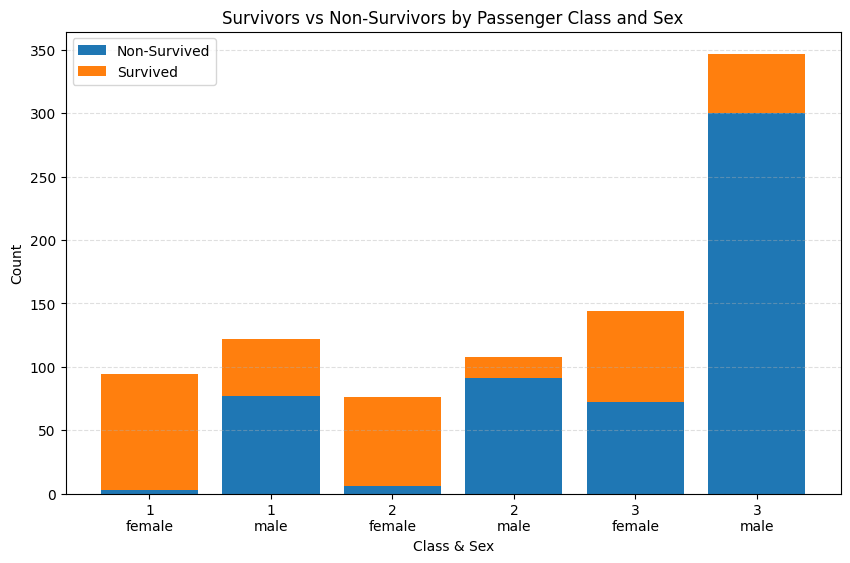

In [7]:
stack_data = df_train.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
# index example: (1, 'male'), (1, 'female'), ...
x_labels = [f"{cls}\n{sex}" for cls, sex in stack_data.index]

# bottom stacking
bottom_vals = stack_data[0]
plt.bar(x_labels, stack_data[0], label="Non-Survived")
plt.bar(x_labels, stack_data[1], bottom=stack_data[0], label="Survived")
plt.title("Survivors vs Non-Survivors by Passenger Class and Sex")
plt.xlabel("Class & Sex")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()